## Experiments with Embeddings

This notebook is used to experiment with different embeddings we retrieve from language models like BERT and GPT-2. 
Ultimately, words translated in different languages are plotted against each other to show the capabilities of cross-lingual embeddings.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

### 1. Single Sentence

#### Extract Embeddings from BERT

In [94]:
# from https://github.com/huggingface/transformers/issues/1950
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

MODEL_TYPE = 'bert-base-multilingual-uncased'
sequence = ["Today, the sun is shining."]

tokenizer = BertTokenizer.from_pretrained(MODEL_TYPE)
model = TFBertModel.from_pretrained(MODEL_TYPE)

In [112]:
# embeddings 
input_ids = tf.constant(tokenizer.encode(sequence[0]))[None, :] # Batch size 1
outputs = model(input_ids)
last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

In [113]:
outputs

(<tf.Tensor: shape=(1, 9, 768), dtype=float32, numpy=
 array([[[-0.00212251, -0.04230585, -0.03695792, ...,  0.01820279,
          -0.18701136,  0.03091383],
         [ 0.10887868,  0.06550939, -0.37081745, ...,  0.21875407,
          -0.364311  , -0.08754867],
         [ 0.20696834, -0.19406171, -0.28209603, ..., -0.09924197,
          -0.6044723 ,  0.06912363],
         ...,
         [ 0.1775671 ,  0.31336847,  0.01536524, ...,  0.12102044,
          -0.39190322,  0.3377126 ],
         [-0.12370267,  0.5159708 , -0.29101226, ..., -0.21107596,
          -0.3886819 , -0.14851308],
         [-0.01811131,  0.09140932, -0.5503062 , ...,  0.5049992 ,
          -0.3916879 , -0.33403724]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 768), dtype=float32, numpy=
 array([[ 1.34351134e-01,  3.60895582e-02,  1.68589160e-01,
          2.30180204e-01,  1.95597216e-01,  4.40726101e-01,
          2.09896743e-01, -1.91823095e-01, -2.30206624e-01,
          3.20624530e-01, -2.84017384e-01, -3.16331118e-01

In [96]:
input_ids

<tf.Tensor: shape=(1, 9), dtype=int32, numpy=
array([[  101, 13980,   117, 10103, 13630, 10127, 76416,   119,   102]],
      dtype=int32)>

In [97]:
last_hidden_states

<tf.Tensor: shape=(1, 9, 768), dtype=float32, numpy=
array([[[-0.00212251, -0.04230585, -0.03695792, ...,  0.01820279,
         -0.18701136,  0.03091383],
        [ 0.10887868,  0.06550939, -0.37081745, ...,  0.21875407,
         -0.364311  , -0.08754867],
        [ 0.20696834, -0.19406171, -0.28209603, ..., -0.09924197,
         -0.6044723 ,  0.06912363],
        ...,
        [ 0.1775671 ,  0.31336847,  0.01536524, ...,  0.12102044,
         -0.39190322,  0.3377126 ],
        [-0.12370267,  0.5159708 , -0.29101226, ..., -0.21107596,
         -0.3886819 , -0.14851308],
        [-0.01811131,  0.09140932, -0.5503062 , ...,  0.5049992 ,
         -0.3916879 , -0.33403724]]], dtype=float32)>

In [98]:
# tokens in a list format
token_ids = tokenizer.encode_plus(sequence[0], max_length=50, pad_to_max_length=False)['input_ids']
token_ids

[101, 13980, 117, 10103, 13630, 10127, 76416, 119, 102]

In [99]:
labels = [tokenizer.decode(int(token_id)) for token_id in token_ids]
labels

['[ C L S ]',
 't o d a y',
 ',',
 't h e',
 's u n',
 'i s',
 's h i n i n g',
 '.',
 '[ S E P ]']

In [100]:
#outputs = model(input_ids)

In [101]:
#last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

In [102]:
type(last_hidden_states[0])

tensorflow.python.framework.ops.EagerTensor

#### Dimensionality Reduction

##### t-SNE

In [103]:
# adapted from https://github.com/ioannispartalas/CrossLingual-NLP-AMLD2020/blob/master/notebooks/AMLD%20Intro.ipynb

# For more information of TSNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [104]:
# error for three dimensions

def plot_embeddings(tokens,labels,sequences,dimensions):
    tsne_model = TSNE(perplexity=1.5, n_components=dimensions, init='pca', n_iter=2500, random_state=23)

    if len(sequences)>1:
        tsne_inputs = []
        for index,sequence in enumerate(sequences):
            tsne_inputs.append(np.array(tokens[index][0]))

        tsne_outputs = []
        for index,sequence in enumerate(sequences):
            tsne_outputs.append(tsne_model.fit_transform(np.array(tsne_inputs[index])))

        x = [list(zip(*tsne_outputs[index]))[0] for index,sequence in enumerate(sequences)]
        y = [list(zip(*tsne_outputs[index]))[1] for index,sequence in enumerate(sequences)]
        if dimensions == 3:
            z = [list(zip(*tsne_outputs[index]))[2] for index,sequence in enumerate(sequences)]


        plt.figure(figsize=(7, 6)) 
        if dimensions == 2:
            for index in range(len(sequences)):
                plt.scatter(x[index],y[index])

                print(len(x[index]))

                for i in range(len(x[index])):
                    if index != 0:
                        #i+index*len(x[index-1]) for the second loop is (0-10)+1*9 (which is the length of the previous iteration)
                        plt.annotate(labels[i+index*len(x[index-1])],
                                     xy=(x[index][i], y[index][i]),
                                     xytext=(5, 2),
                                     textcoords='offset points',
                                     ha='right',
                                     va='bottom')
                    else:
                        plt.annotate(labels[i],
                                     xy=(x[index][i], y[index][i]),
                                     xytext=(5, 2),
                                     textcoords='offset points',
                                     ha='right',
                                     va='bottom')
        #elif dimensions == 3:
            #for index in range(len(sequences)):
            #    plt.scatter(x[index],y[index],z[index])

            #    print(len(x[index]))

            #    for i in range(len(x[index])):
            #        if index != 0:
            #            #i+index*len(x[index-1]) for the second loop is (0-10)+1*9 (which is the length of the previous iteration)
            #            plt.annotate(labels[i+index*len(x[index-1])],
            #                         xyz=(x[index][i], y[index][i], z[index][i]),
            #                         xyztext=(5, 2, 2),
            #                         textcoords='offset points',
            #                         ha='right',
            #                         va='bottom')
            #        else:
            #            plt.annotate(labels[i],
            #                         xyz=(x[index][i], y[index][i], z[index][i]),
            #                         xytext=(5, 2, 2),
            #                         textcoords='offset points',
            #                         ha='right',
            #                         va='bottom')
            #            
    else:
        tsne_outputs = tsne_model.fit_transform(tokens)

        x = tsne_outputs[:,0]
        y = tsne_outputs[:,1]
        if dimensions == 3:
            z = tsne_outputs[:,2]


        plt.figure(figsize=(7, 6)) 
        
        if dimensions == 2:
            plt.scatter(x,y)

            print(len(x))
            print(len(labels))
            for i in range(len(x)):
                plt.annotate(labels[i],
                             xy=(x[i], y[i]),
                             xytext=(5, 2),
                             textcoords='offset points',
                             ha='right',
                             va='bottom')
        
        #elif dimensions == 3:
            #plt.scatter(x,y,z)

            #print(len(x))
            #print(len(labels))
            #for i in range(len(x)):
            #    plt.annotate(labels[i],
            #                 xyz=(x[i], y[i], z[i]),
            #                 xyztext=(5, 2, 2),
            #                 textcoords='offset points',
            #                 ha='right',
            #                 va='bottom')

In [105]:
def plot_embeddings_old(tokens,labels,sequences):
    tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = new_values[:,0]
    y = new_values[:,1]


    plt.figure(figsize=(7, 6)) 
    if len(sequences)>1:
        
        flatten_tokens = [item for sublist in token_ids_multiple for item in sublist]
        start_next_sequence = int(len(flatten_tokens) / len(sequences))

        plt.scatter(x[:start_next_sequence],y[:start_next_sequence])

        for index,sequence in enumerate(sequences[1:]):
            print(start_next_sequence*index)
            print(type(start_next_sequence*index))
            plt.scatter(x[start_next_sequence*index:],y[start_next_sequence*index:])
    else:
        plt.scatter(x,y)

        print(len(x))
        print(len(labels))
        for i in range(len(x)):
            plt.annotate(labels[i],
                         xy=(x[i], y[i]),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')

In [106]:
last_hidden_states.numpy()[0].shape

(9, 768)

In [107]:
tokens = last_hidden_states.numpy()[0].tolist()
len(tokens)

9

In [108]:
type(tokens)

list

In [109]:
len(sequence)


1

9
9


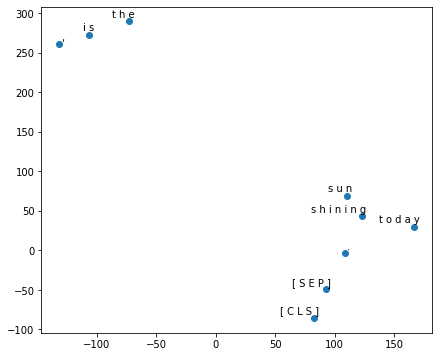

In [110]:
plot_embeddings(tokens,labels,sequence,2)

9
9


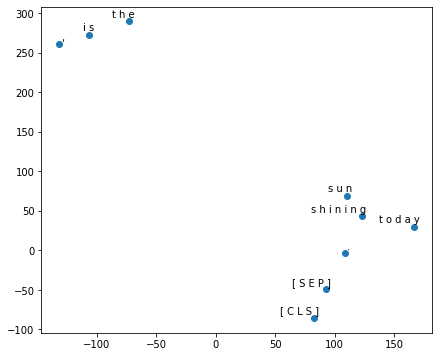

In [111]:
plot_embeddings_old(tokens,labels,sequence)

### 2. Multiple Sentences

#### Extract Embeddings from BERT

In [68]:
sequences = ["The sun is shining today.","Heute scheint die Sonne."]


In [69]:
input_ids_multiple = []
outputs_multiple = []
last_hidden_states_multiple = []
token_ids_multiple = []
for index,sequence in enumerate(sequences):
    print(index)
    #input_ids_multiple = [tf.constant(tokenizer.encode(sequences[index]))[None, :] for index,sequence in enumerate(sequences)] # Batch size 1

    input_ids_multiple.append(tf.constant(tokenizer.encode(sequences[index]))[None, :])

#for index,sequence in enumerate(sequences):    
    outputs_multiple.append(model(input_ids_multiple[index]))
    last_hidden_states_multiple.append(outputs_multiple[index][0])
    token_ids_multiple.append(tokenizer.encode_plus(sequences[index], max_length=50, pad_to_max_length=False)['input_ids'])


0
1


In [70]:
input_ids_multiple

[<tf.Tensor: shape=(1, 8), dtype=int32, numpy=
 array([[  101, 10103, 13630, 10127, 76416, 13980,   119,   102]],
       dtype=int32)>,
 <tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[  101, 12830, 63670, 10121, 55772,   119,   102]], dtype=int32)>]

In [71]:
outputs_multiple[1][0]

<tf.Tensor: shape=(1, 7, 768), dtype=float32, numpy=
array([[[-0.03728386, -0.06621784,  0.00267007, ...,  0.0095383 ,
         -0.02197413,  0.01682217],
        [-0.2239869 ,  0.10805385, -0.11152601, ..., -0.19501083,
          0.14965147, -0.18606436],
        [ 0.14967746,  0.06670024, -0.10517658, ...,  0.10906505,
          0.4234122 ,  0.1378217 ],
        ...,
        [-0.3265287 ,  0.26770118, -0.03685226, ...,  0.03913976,
          0.1486316 ,  0.13926286],
        [-0.04917366,  0.17850429, -0.10172349, ..., -0.07809272,
         -0.22293195, -0.5380194 ],
        [-0.45162228,  0.3646025 , -0.5640673 , ...,  0.4400453 ,
          0.22719723, -0.901891  ]]], dtype=float32)>

In [72]:
last_hidden_states_multiple

[<tf.Tensor: shape=(1, 8, 768), dtype=float32, numpy=
 array([[[-0.04357933, -0.04203939, -0.01226367, ...,  0.00603494,
          -0.16497874,  0.06665322],
         [ 0.3022419 ,  0.16545165, -0.00670882, ..., -0.39213207,
           0.36342543, -0.09476599],
         [ 0.15484755,  0.11077944, -0.2748264 , ...,  0.11286385,
          -0.04750642,  0.44121438],
         ...,
         [ 0.24884075, -0.13286759,  0.07762373, ...,  0.6459499 ,
          -0.5612527 , -0.09073683],
         [-0.0381079 ,  0.53142595, -0.34584787, ..., -0.13847667,
          -0.41139948, -0.06327479],
         [ 0.00585468,  0.15419501, -0.5263755 , ...,  0.5416797 ,
          -0.13099965, -0.3099177 ]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 7, 768), dtype=float32, numpy=
 array([[[-0.03728386, -0.06621784,  0.00267007, ...,  0.0095383 ,
          -0.02197413,  0.01682217],
         [-0.2239869 ,  0.10805385, -0.11152601, ..., -0.19501083,
           0.14965147, -0.18606436],
         [ 0.14967746,  0.0

In [73]:
# tokens
token_ids_multiple

[[101, 10103, 13630, 10127, 76416, 13980, 119, 102],
 [101, 12830, 63670, 10121, 55772, 119, 102]]

In [74]:
# this is not used anymore
flatten_tokens_multiple = [item for sublist in token_ids_multiple for item in sublist]
flatten_tokens_multiple

[101,
 10103,
 13630,
 10127,
 76416,
 13980,
 119,
 102,
 101,
 12830,
 63670,
 10121,
 55772,
 119,
 102]

In [75]:
labels_multiple = [tokenizer.decode(int(token_id)) for token_id in flatten_tokens_multiple] 
labels_multiple

['[ C L S ]',
 't h e',
 's u n',
 'i s',
 's h i n i n g',
 't o d a y',
 '.',
 '[ S E P ]',
 '[ C L S ]',
 'h e u t e',
 's c h e i n t',
 'd i e',
 's o n n e',
 '.',
 '[ S E P ]']

In [76]:
print(len(labels_multiple), len(flatten_tokens_multiple))

15 15


#### Dimensionality Reduction

##### T-SNE

In [77]:
#tsne_inputs = []
#for index,sequence in enumerate(sequences):
#    tsne_inputs.append(np.array(last_hidden_states_multiple[index][0]))

In [78]:
#tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
#tsne_outputs = []
#for index,sequence in enumerate(sequences):
#    tsne_outputs.append(tsne_model.fit_transform(np.array(tsne_inputs[index])))
    
#tsne_outputs
#new_values = [tsne_model.fit_transform(last_hidden_states_multiple) for sequence in sequences]
#new_values
#np.array(new_values)

In [79]:
#print(len(list(zip(*tsne_outputs[0]))[0]), \
#len(list(zip(*tsne_outputs[1]))[0]))

In [80]:
#x = [list(zip(*tsne_outputs[index]))[0] for index,sequence in enumerate(sequences)]
#y = [list(zip(*tsne_outputs[index]))[1] for index,sequence in enumerate(sequences)]
#x
#tsne_outputs[0][:]
#tsne_outputs[:,0]
#tsne_outputs[index_sequence][index_array][0]

In [81]:
#next(zip(*tsne_outputs))

In [82]:
#all_tokens_multiple = [last_hidden_states_multiple[index][0] for index,sequence in enumerate(sequences)]
#all_tokens_multiple
#all_tokens_multiple[0].numpy()[0].shape
#all_tokens_multiple[0].numpy()[0].tolist()

In [83]:
#tokens_multiple = [all_tokens_multiple[index].numpy()[0].tolist() for index,sequence in enumerate(sequences)][0]

In [84]:
#print("tokens: ",len(tokens_multiple),"  dimensions: ",len(tokens_multiple[0]))

In [85]:
#len(all_tokens_multiple[0])

In [86]:
#tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
#new_values = [tsne_model.fit_transform(tokens_multiple) for sequence in sequences]
#new_values
#np.array(new_values)

In [87]:
#sequence_1 = tsne_model.fit_transform(tokens_multiple[:len(tokens_multiple[0])])
#sequence_1

In [88]:
#sequence_2 = tsne_model.fit_transform(tokens_multiple[len(tokens_multiple[0]):])
#sequence_2

In [89]:
#len(x[0])

In [90]:
#range(len(sequences))

In [91]:
#tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
#new_values = [tsne_model.fit_transform(tokens_multiple) for sequence in sequences]


#plt.figure(figsize=(7, 6)) 
#for index in range(len(sequences)):
#    plt.scatter(x[index],y[index])
#    for i in range(len(x[index])):
#        plt.annotate(labels_multiple[i],
#                     xy=(x[index][i], y[index][i]),
#                     xytext=(5, 2),
#                     textcoords='offset points',
#                     ha='right',
#                     va='bottom')

In [92]:
#tsne_model = TSNE(perplexity=1.5, n_components=2, init='pca', n_iter=2500, random_state=23)
#new_values = tsne_model.fit_transform(tokens)

#x = new_values[:,0]
#y = new_values[:,1]

#start_next_sequence = int(len(tokens) / len(sequences))

#plt.figure(figsize=(7, 6)) 
#plt.scatter(x[:start_next_sequence],y[:start_next_sequence])
#plt.scatter(x[start_next_sequence:],y[start_next_sequence:])

#for i in range(len(x)):
#    plt.annotate(labels[i],
#                 xy=(x[i], y[i]),
#                 xytext=(5, 2),
#                 textcoords='offset points',
#                 ha='right',
#                 va='bottom')

8
7


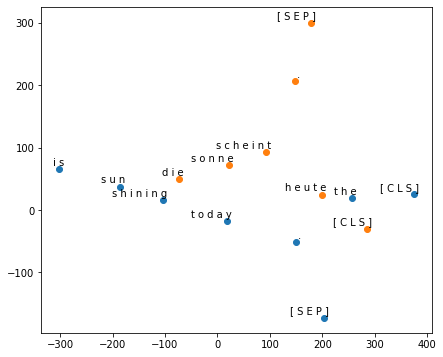

In [93]:
plot_embeddings(last_hidden_states_multiple,labels_multiple,sequences,2)

In [114]:
plot_embeddings(last_hidden_states_multiple,labels_multiple,sequences,3)
# dimension 3 requires a z axis and a new plot...

<Figure size 504x432 with 0 Axes>

### Word translations

In [115]:
words_en = ["sun","dog","queen","king","street","wonderful","car"]
words_de = ["Sonne","Hund","Königin","König","Strasse","wunderbar","Auto"]
words_fr = ["soleil","chien","reine","roi","rue","merveilleux","voiture"]

In [117]:
words = [words_en, words_de, words_fr]
words

[['sun', 'dog', 'queen', 'king', 'street', 'wonderful', 'car'],
 ['Sonne', 'Hund', 'Königin', 'König', 'Strasse', 'wunderbar', 'Auto'],
 ['soleil', 'chien', 'reine', 'roi', 'rue', 'merveilleux', 'voiture']]

In [126]:
# embeddings 
input_ids_en = tf.constant(tokenizer.encode(words[0]))[None, :] # Batch size 1
outputs_en = model(input_ids)
last_hidden_states_en = outputs[0]  # The last hidden-state is the first element of the output tuple

In [125]:
#plot_embeddings(last_hidden_states_en,labels_multiple,sequences,2)

InvalidArgumentError: slice index 1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

#### PCA